## Kmeans++

In [50]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#Creating the data
np.random.seed(0)
N = 2000
data1 = np.random.randn(N//3,2) + np.array([-2,3])
data2 = np.random.randn(N//3,2) + np.array([2,4])
data3 = np.random.randn(N//3,2) + np.array([7,6])
X = np.concatenate((data1, data2, data3))

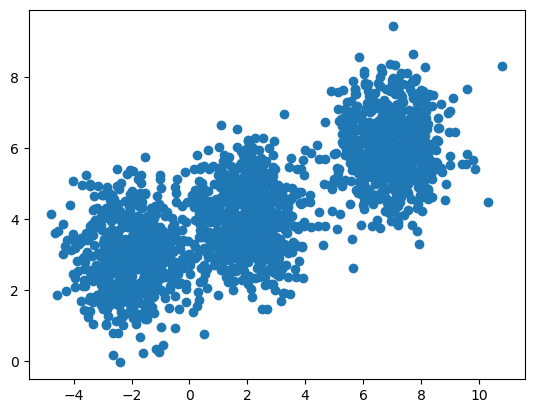

In [52]:
#Plotting the data
plt.scatter(X[:,0], X[:,1])

In [53]:
#defining probabilities
init = X[np.argmax(np.mean(X,axis=1))]
k = 3
def dist_prob(X, initialPoint):
    distance = np.array([])
    for each in X:
        distance = np.append(distance, np.linalg.norm(each - initialPoint))
    distanceSum = np.sum(distance)
    probability = [x/distanceSum for x in distance]
    return probability

In [54]:
#Choosing cluster on the basis of prob
init = X[np.argmax(np.mean(X,axis=1))]
init
weights = dist_prob(X,init)
np.random.seed(0)
centers = X[np.random.choice(X.shape[0], size = k, p = weights)]

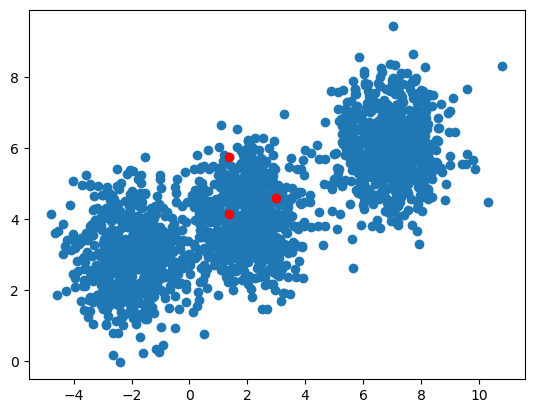

In [55]:
#plotting the data
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],c = 'red')

In [56]:
#Redefining the cluster
def re_def_clus(X, centers):
    clusters = np.array([])
    for each in X:
        dist = [np.linalg.norm(each-x) for x in centers]
        clusters = np.append(clusters, np.argmin(dist))
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c = clusters)
    plt.scatter(centers[:,0],centers[:,1],c = 'red')
    plt.show()
    newCenters = np.array([])
    for i in range(k):
        newCenters = np.append(newCenters,np.array(np.mean(X[clusters == i],axis = 0)))
    newCenters = newCenters.reshape(-1,X.shape[1])
    return newCenters

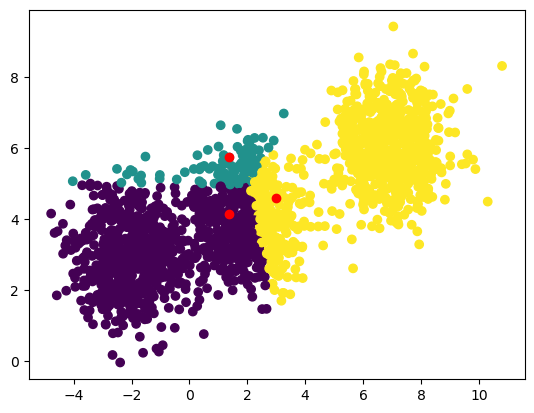

[[-0.79718837  3.18053696]
 [ 1.0408064   5.49864174]
 [ 5.91795855  5.50470838]]


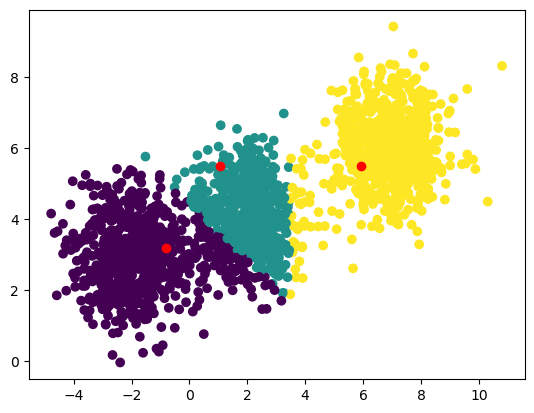

[[-1.57468639  2.94312778]
 [ 1.98929377  4.27106193]
 [ 6.74309836  5.88728649]]


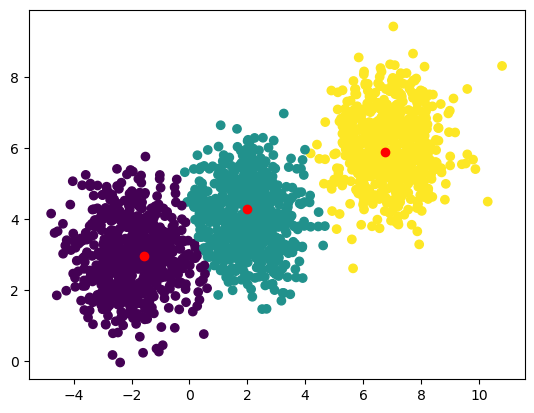

[[-1.97100844  2.95668322]
 [ 2.01319321  4.0513046 ]
 [ 6.92122607  6.00159801]]


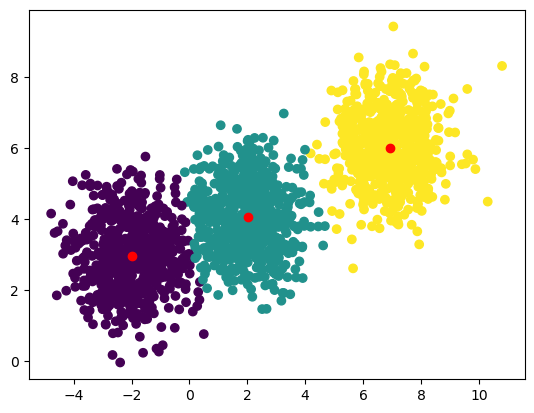

[[-2.00904864  2.95967698]
 [ 1.9855217   4.03001272]
 [ 6.92122607  6.00159801]]


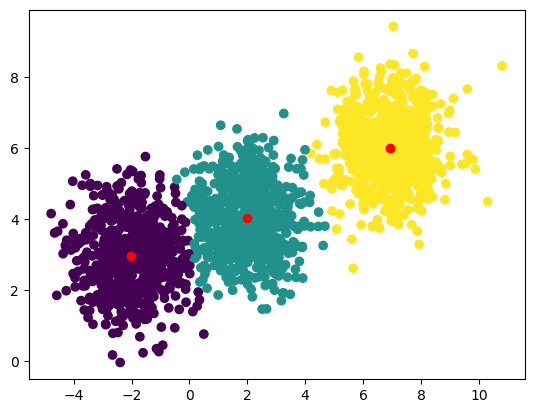

[[-2.01816782  2.95763025]
 [ 1.97664843  4.02723483]
 [ 6.92122607  6.00159801]]


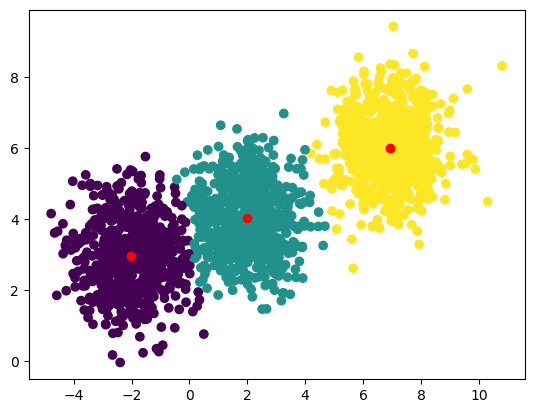

Convergence in : 5 iterations


In [57]:
#loop till convergence
count=0
for _ in range(10):
    prev = centers
    centers = re_def_clus(X,centers)
    if np.array_equal(prev,centers):
        break
    print(centers)
    count += 1
print(f"Convergence in : {count} iterations")